# Восстановление смазанных изображений  
## Незашумленное изображение  
В данной лабораторной работе исследуется восстановление смазанных изображений при известной функции движения  
Для начала импортируем необходимые библиотеки

In [1]:
from reader import bin2float
import numpy as np
from matplotlib import pyplot as plt
import analysis.FT as FT
from analysis.preprocessing import make_complex, restore_image
%matplotlib inline

Далее укажем ширину и высоту изображения, а также длину ядерной функции

In [2]:
width = 259
height = 185
kernel_length = 64

Ядерная функция хранится в отдельном файле, после ее прочтения необходмио применить к ней преобразование Фурье для того, чтобы получить спектр этой функции

In [3]:
# Загружаем функцию
h_func = bin2float("data/Восстановление/kernL64_f4.dat", kernel_length)
h_func = list(h_func)
h_func.extend([0]*(width - kernel_length))
h_func = np.array(h_func)
print("Длина функции: ", len(h_func))

# Получаем спектр
h_func_FT = FT.fourier_transform(h_func, 1)
h_func_FT = make_complex(h_func_FT.Re, h_func_FT.Im)
print("Последний элемент: ", h_func_FT[-1])

Длина функции:  259
Последний элемент:  (0.632982747774-0.513790223655j)


Далее загрузим смазанное изображение и визуализируем его.

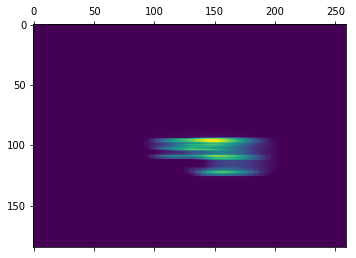

In [4]:
blur_229 = bin2float("data/Восстановление/sblur259x185L.dat", width*height)
blur_229 = np.array(blur_229).reshape((height, width))
plt.matshow(blur_229)
plt.show()

Далее необходимо получить спектр картинки. Для этого мы построчно делаем преобразование Фурье над изображением

In [5]:
blur_229_FT = np.empty_like(blur_229, dtype=np.complex)
i = 0
for x in blur_229[:, :]:
	line = FT.fourier_transform(x, 1)
	line = make_complex(line.Re, line.Im)
	blur_229_FT[i, :] = line
	i += 1

После чего делим полученные данные на спектр ядерной функции

In [6]:
for row in range(blur_229_FT.shape[0]):
	blur_229_FT[row, :] /= h_func_FT

После данной операции остается только провести обратное преобразование Фурье и отобразить полученную картинку

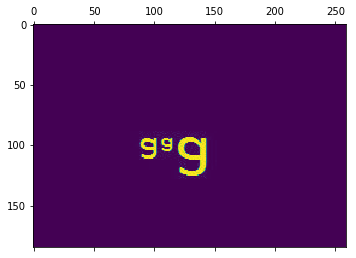

In [7]:
blur_229_restored = np.empty_like(blur_229)
for x in range(blur_229.shape[0]):
	line = blur_229_FT[x, :]
	new_line = []
	for i in line:
		new_line.append(i.real + i.imag)
	blur_229_restored[x, :] = FT.reverse_fourier_transform(np.array(new_line), 1)
plt.matshow(blur_229_restored)
plt.show()

## Зашумленное изображение  
Аналогично делаем с зашумленным изображением, но функция деления будет немного другая.  
Для начала повторим все предыдущие шаги.  
Загрузим изображение и посчитаем преобразование Фурье.

In [8]:
blur_229 = bin2float("data/Восстановление/sblur259x185L_Nm2.dat", width*height)
blur_229 = np.array(blur_229).reshape((height, width))
blur_229_FT = np.empty_like(blur_229, dtype=np.complex)
i = 0
for x in blur_229[:, :]:
	line = FT.fourier_transform(x, 1)
	line = make_complex(line.Re, line.Im)
	blur_229_FT[i, :] = line
	i += 1

Функция деления в данном случае будет выглядеть немного сложнее.

In [9]:
a = 0.01
for row in range(blur_229_FT.shape[0]):
	div = blur_229_FT[row, :] * np.conjugate(h_func_FT)
	blur_229_FT[row, :] = div / (np.absolute(h_func_FT)**2 + a**2)

После деления точно так же делаем обратное преобразование Фурье и визуализируем картинку

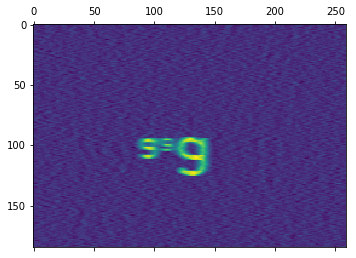

In [10]:
blur_229_restored = np.empty_like(blur_229)
for x in range(blur_229.shape[0]):
	line = blur_229_FT[x, :]
	new_line = []
	for i in line:
		new_line.append(i.real + i.imag)
	blur_229_restored[x, :] = FT.reverse_fourier_transform(np.array(new_line), 1)
plt.matshow(blur_229_restored)
plt.show()

Оформив все это для удобства в одну функцию, аналогичным образом восстановим еще пару картинок.

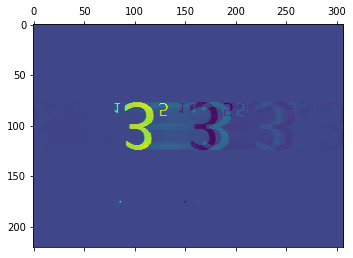

In [11]:
ans = restore_image("data/Восстановление/sblur307x221D.dat", 307, 221,
                    "data/Восстановление/kernL64_f4.dat", 64)
plt.matshow(ans)
plt.show()

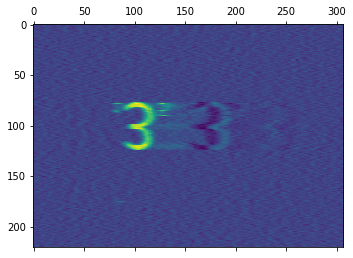

In [12]:
ans = restore_image("data/Восстановление/sblur307x221D_Nm2.dat", 307, 221,
                    "data/Восстановление/kernL64_f4.dat", 64,
                    True, 0.01)
plt.matshow(ans)
plt.show()